In [4]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from src.load_data import *
from src.graphs import *
from src.statistical_tests import *
from src.utils import *

## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



In [5]:
data = get_data(format_type='all', remove_minus_ones = False)
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the data:')
data.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the data:


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,previous treatment
0,1.Gasek,57,57,1,1,10.43594,10.435942,,Yes
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,NaN
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,NaN
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,NaN
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,NaN
5,2. Kołodziejska,217,217,2,1,66.95658,66.956580,,Yes
6,2. Kołodziejska,42,259,0,2,20.93472,73.874130,,NaN
7,2. Kołodziejska,21,280,0,4,-1.00000,81.844740,,NaN
8,2. Kołodziejska,26,306,0,5,-59.55360,71.032640,,NaN
9,2. Kołodziejska,294,600,3,6,76.67272,93.242700,,NaN


## Get ANOVA & ttest between buckets:

default time group has GROUPS defined as: [0, 90, 180, 270, 360]




anova results:
buckets: [1, 3, 6, 10, 15]
p_value: 6.310656069339705e-16

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.87 vs 41.85
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 9 bucket
means: 41.85 vs 54.07
p-value: 0.00017

statistics between 6 - 9 bucket and 10 - 14 bucket
means: 54.07 vs 53.04
p-value: 0.61128



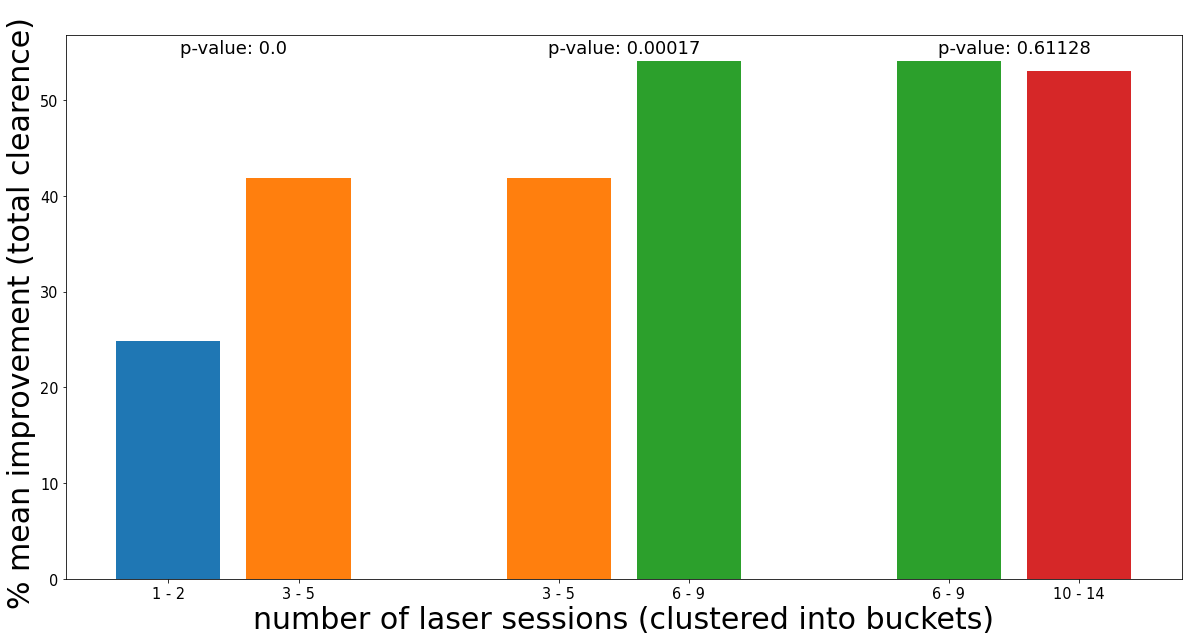

In [5]:
from src.statistical_tests import bucket_anova_n_plot
bucket_anova_n_plot()

default time group has GROUPS defined as: [0, 90, 180, 270, 360]




anova results:
buckets: [1, 3, 6, 10, 100]
p_value: 1.4893542134955585e-19

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.87 vs 41.85
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 9 bucket
means: 41.85 vs 54.07
p-value: 0.00017

statistics between 6 - 9 bucket and 10 + bucket
means: 54.07 vs 54.77
p-value: 0.40709



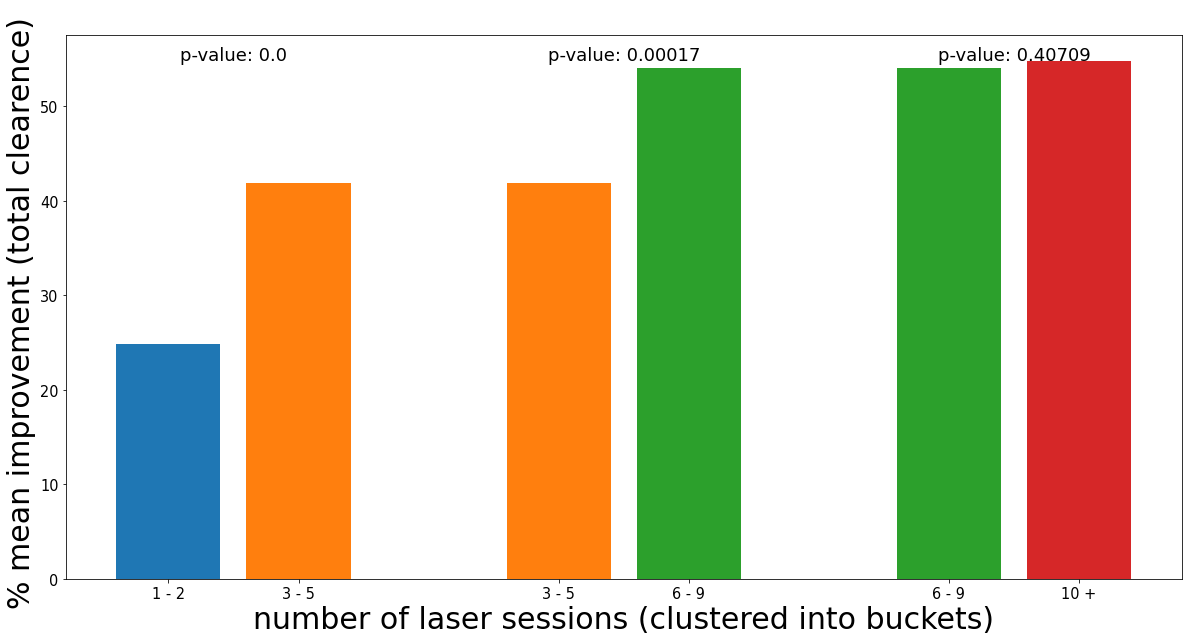

In [6]:
bucket_anova_n_plot(buckets = [1,3,6,10,100])

### Stats for abstract:

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
median of maximum total clearence: 64.440532
% of patients that had a total_clearence of minimum 25%: 87.5
% of patients that had a total_clearence of minimum 50%: 71.42857142857143
% of patients that had a total_clearence of minimum 75%: 26.785714285714285
% of patients that had a total_clearence of minimum 90%: 5.357142857142857




default time group has GROUPS defined as: [0, 90, 180, 270, 360]
limit: 0. |% patients: 96.43
limit: 5. |% patients: 96.43
limit: 10. |% patients: 96.43
limit: 15. |% patients: 92.86
limit: 20. |% patients: 89.29
limit: 25. |% patients: 87.5
limit: 30. |% patients: 85.71
limit: 35. |% patients: 83.93
limit: 40. |% patients: 82.14
limit: 45. |% patients: 75.0
limit: 50. |% patients: 71.43
limit: 55. |% patients: 66.07
limit: 60. |% patients: 55.36
limit: 65. |% patients: 50.0
limit: 70. |% patients: 35.71
limit: 75. |% patients: 26.79
limit: 80. |% patients: 19.64
limit: 85. |% patients: 7.14

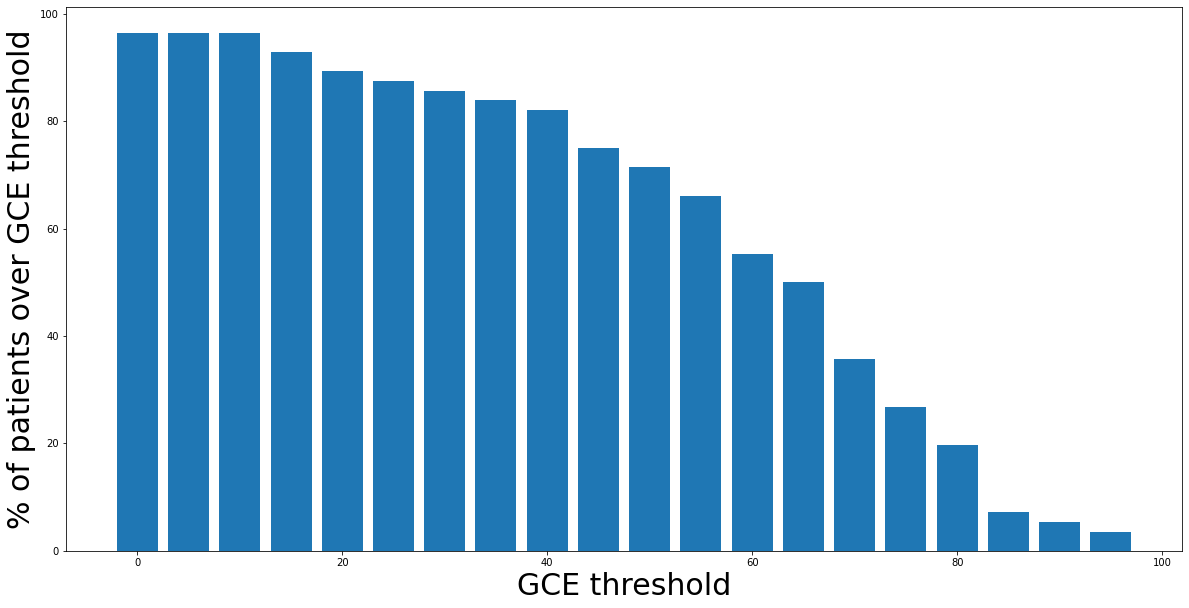

In [7]:
get_stats_for_abstract(df = None, format_type = 'all')
print("\n\n\n")
get_graph_GCE_vs_pct_people()

In [8]:
get_stats_for_abstract2(df = None, format_type = 'all', visit_number_buckets = [0,2,5,10,15,20])

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
bucket: 2
bucket: 5
bucket: 10
bucket: 15
bucket: 20
[31.1877, 48.17761, 56.97438, 59.613085, 60.15053]


,surname,total_clearence_in_respect_to_beginning
0,1.Gasek,30.519873
1,10.Będzinowski szyja,60.169450
2,11. Cicha-kwiecień,52.934780
3,12. Januszewska,60.984150
4,13.Zborowski,77.379030
5,14.Spica,78.183190
6,15.Czop,81.445970
7,16.Zuterek,29.958000
8,17. Górszczak,74.701220
9,18.Mincberg,37.354880


In [9]:
data, expected_frequences = chi_squared_test(non_moved_df, name = 'example test', display_data = True)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
p-value of chi squred contigency test for example test: 0.003194066074089525 (w. Yates correction - good practice)


days passed,1-90,91-180,181-270,271 - 360,361+,type
mean improvement below 0,,,,,,
False,107,95,20,6,2,frequencies
True,54,38,8,5,10,frequencies


expected frequencies:


,1-90,91-180,181-270,271 - 360,361+,type
False,107.33,88.67,18.67,7.33,8.0,expected_frequences
True,53.67,44.33,9.33,3.67,4.0,expected_frequences


Chi squred contigency test p-value: 0.014


KeyError: 'mean improvement below 0'

# Plots:

In [ ]:
# plt.figure(figsize=(20,10))
# data = get_data(format_type='all',remove_minus_ones = False )
# data2 = get_data(format_type='moved_to_0',remove_minus_ones = False )
# data3 = get_data(format_type='all_without_0s',remove_minus_ones = False )
# agg_column_graph(data, label = 'data bez zmian', column = 'total_clearence_in_respect_to_beginning')
# agg_column_graph(data2, label = 'data moved to 0', column = 'total_clearence_in_respect_to_beginning')
# agg_column_graph(data3, label = 'data without patients without 1st visit', column = 'total_clearence_in_respect_to_beginning', title = 'title')

In [ ]:
a = get_data('all', remove_minus_ones = False)
# len(a.surname.unique())

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


56

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


default time group has GROUPS defined as: [0, 90, 180, 270, 360]


Text(0, 0.5, 'mean improvement (total clearence)')

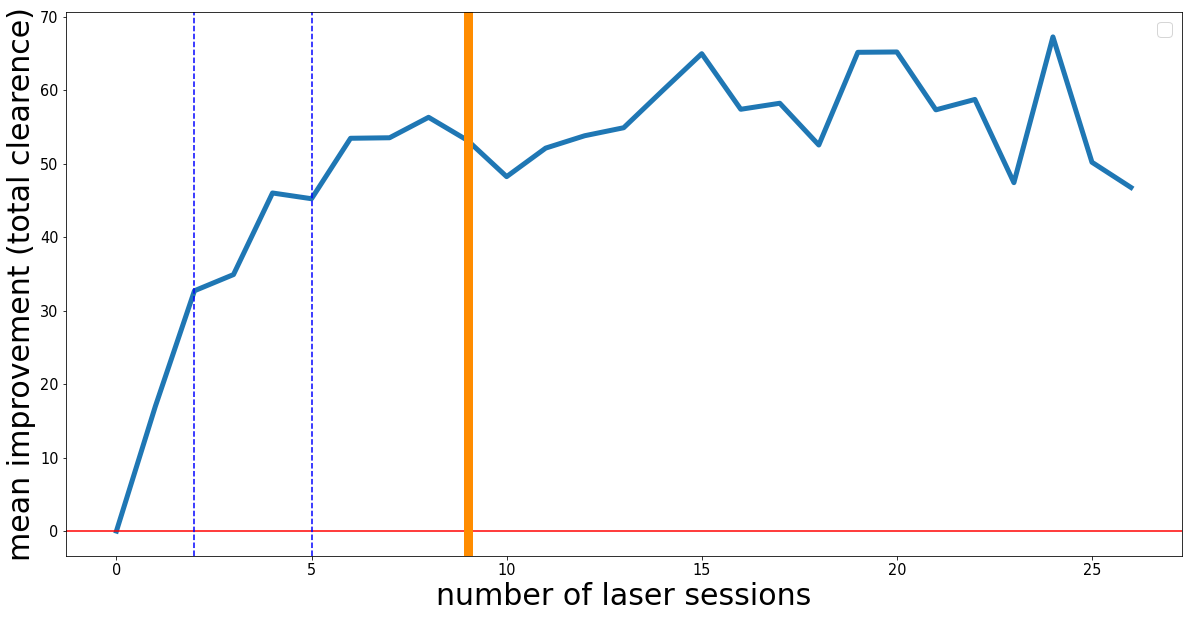

In [ ]:
plt.figure(figsize=(20,10))
data = get_data(format_type='all',remove_minus_ones = False )
agg_column_graph(data, agg = 'mean', label = '', column = 'total_clearence_in_respect_to_beginning', title = '', cut_last_x_visits = 27)
plt.axvline(x=2, color='b', linestyle='--')
plt.axvline(x=5, color='b', linestyle='--')
plt.axvline(x=9, color='darkorange', linestyle='-',  lw = 9)

## NeW
plt.xlabel("number of laser sessions", size = 30)
plt.ylabel("mean improvement (total clearence)", size = 30)

In [ ]:
data = get_data(format_type='all',remove_minus_ones = True )
plt.figure(figsize=(20,10))
agg_column_graph(data, label = '', column = 'total_clearence_in_between_visits', title = 'mean total clearence in respect to previous visit over patients treatment', cut_last_x_visits = 26)

### Showcase of how tests works:

In [ ]:
plt.figure(figsize=(20,12))
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,10,20], 
                           increment = 10, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits')

Pearsons correlation of the linear fit for nie przesunieci: -0.772 (very bad practice though)
Pearsons correlation of the linear fit for przesunieci: -0.770 (very bad practice though)
Pearsons correlation of the linear fit for usunieci bez 1 wizyty: -0.843 (very bad practice though)


,nr_visit_group,patients_in_bucket nie przesunieci
0,0,75
1,5,141
2,10,77
3,15,35
4,20,17


Text(0.5, 0, 'nr_visits_group')

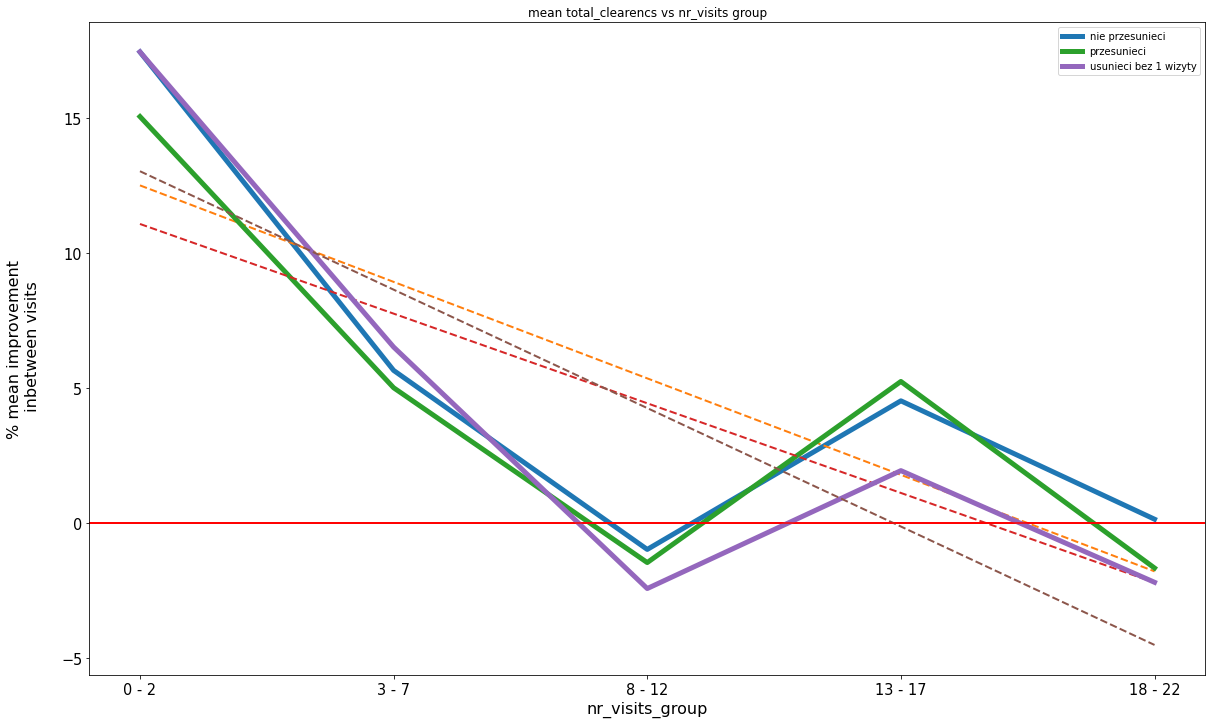

In [ ]:
plt.figure(figsize=(20,12))
a = time_group_based_avg_graph(non_moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'nie przesunieci')
time_group_based_avg_graph(moved_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'przesunieci')

time_group_based_avg_graph(non0s_df, 
                           GROUPS = [0,5,10,15,20], 
                           increment = 5, 
                           display_data_for_chi_square_test = False, 
                           base_column = 'nr_visit_group',
                           column = 'total_clearence_in_between_visits',
                           label = 'usunieci bez 1 wizyty')
display(a)
plt.title('mean total_clearencs vs nr_visits group')
plt.xlabel('nr_visits_group')

## Time Group based avg graphs:
* Removed graphs for patients after 15th and 20th visit - since there is barely any data there

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.808 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 5 and further: -0.738 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 3 and further: -0.758 (very bad practice though)
Pearsons correlation of the linear fit for all visits: -0.813 (very bad practice though)


,time_group,patients_in_bucket visits with nunber 10 and further,patients_in_bucket visits with nunber 5 and further,patients_in_bucket visits with nunber 3 and further,patients_in_bucket all visits
0,0,58,110,141,184
1,100,18,66,92,117
2,200,15,33,37,44


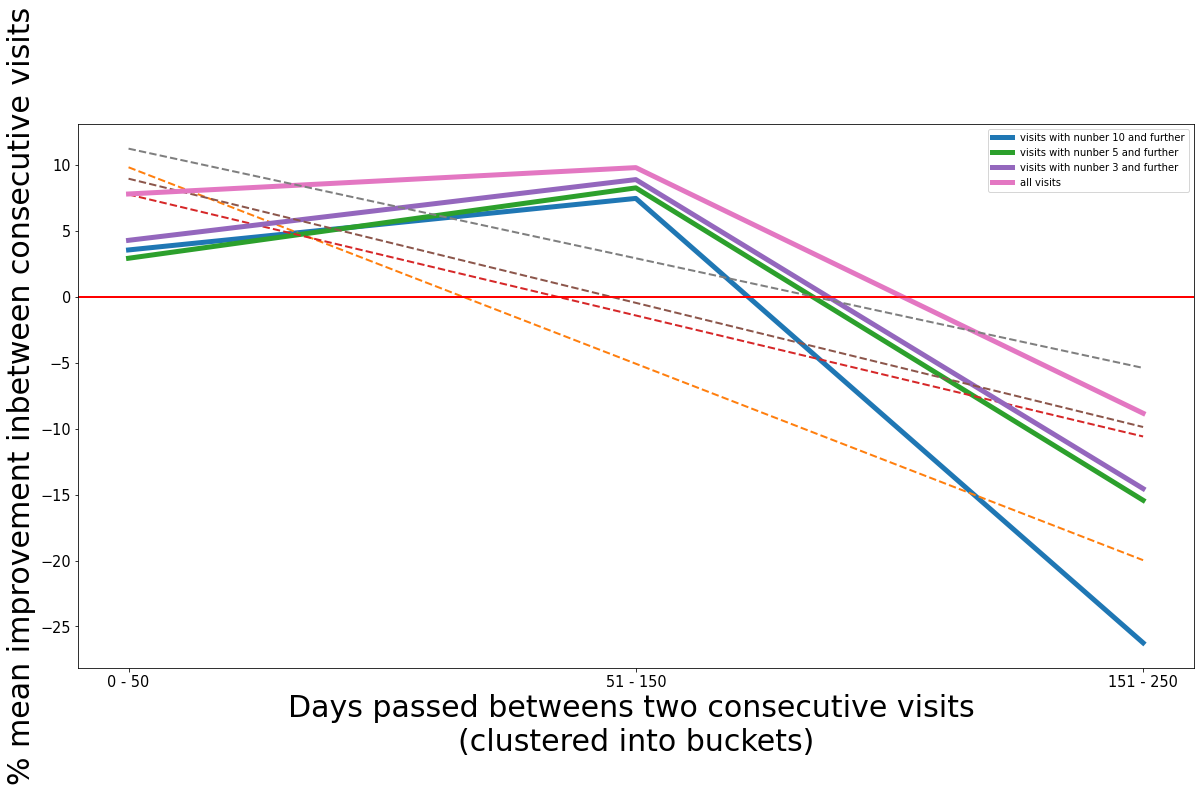

In [ ]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200], increment = 100)

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.894 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 5 and further: -0.894 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 3 and further: -0.890 (very bad practice though)
Pearsons correlation of the linear fit for all visits: -0.885 (very bad practice though)


,time_group,patients_in_bucket visits with nunber 10 and further,patients_in_bucket visits with nunber 5 and further,patients_in_bucket visits with nunber 3 and further,patients_in_bucket all visits
0,0,72,160,212,276
1,200,15,43,49,57
2,400,4,6,9,12


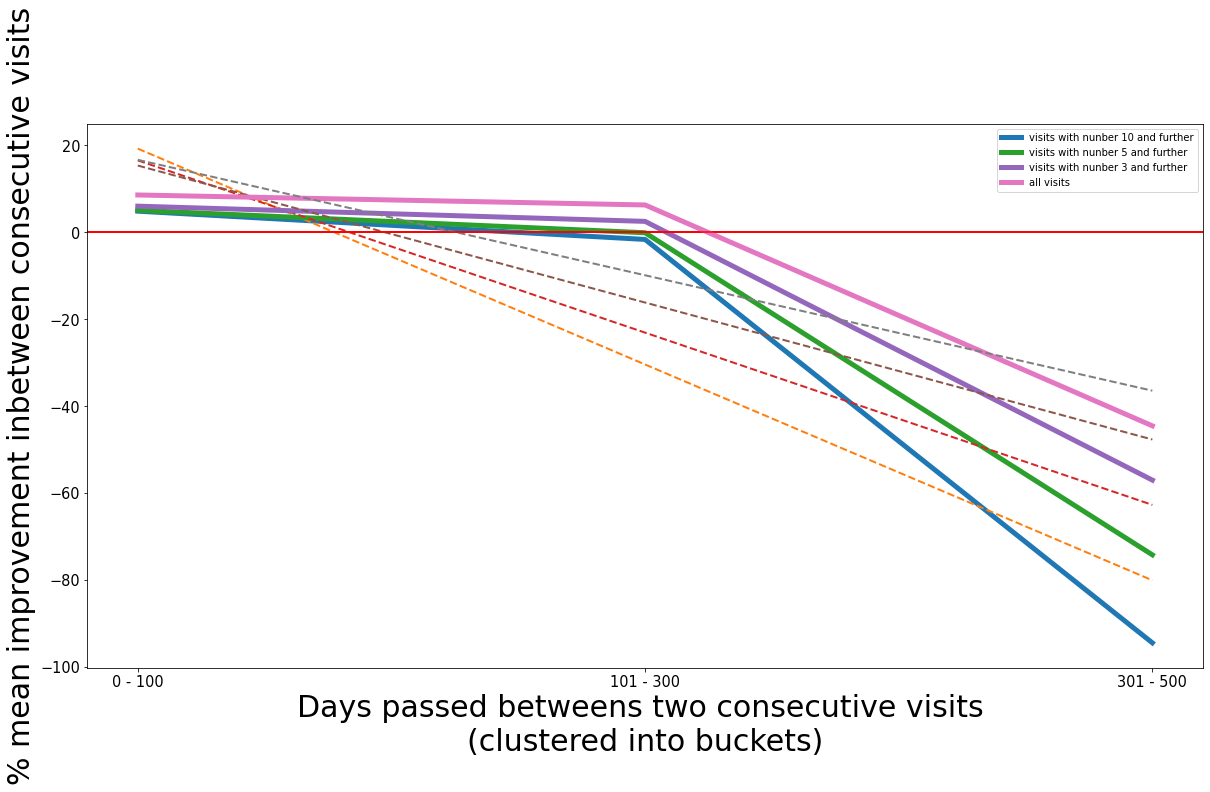

In [ ]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,200,400], increment = 200)

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.802 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 5 and further: -0.879 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 3 and further: -0.880 (very bad practice though)
Pearsons correlation of the linear fit for all visits: -0.860 (very bad practice though)


,time_group,patients_in_bucket visits with nunber 10 and further,patients_in_bucket visits with nunber 5 and further,patients_in_bucket visits with nunber 3 and further,patients_in_bucket all visits
0,0,58,110,141,184
1,100,18,66,92,117
2,200,9,21,22,26
3,300,6,12,15,18


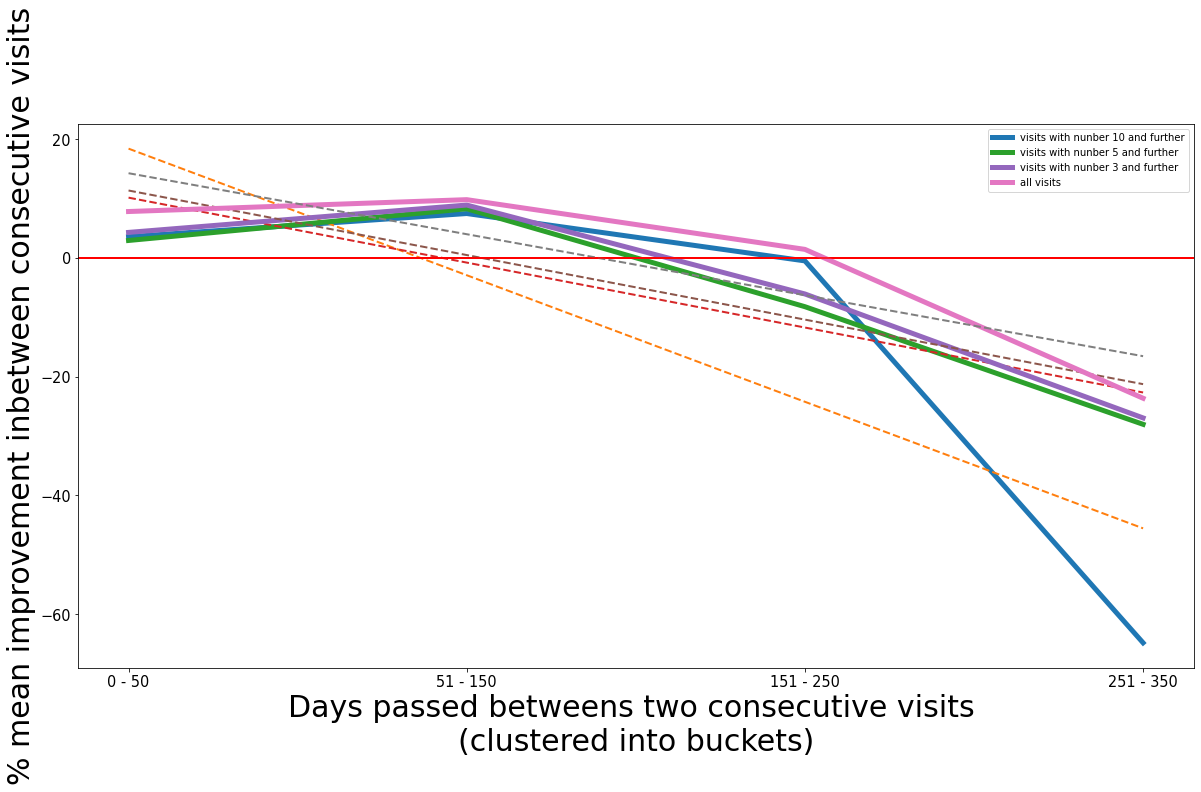

In [ ]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,100,200,300], increment = 100) # I dont like this one

Object `danych` not found.
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,time_group,patients_in_bucket wizyty 29 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 9 i blizsze
0,0,216,199,155
1,120,92,89,76
2,240,25,21,15
3,360,12,10,8


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,49,60,63
1,56,143,185,201
2,112,30,32,33
3,168,32,42,48


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,1,1
1,28,104,138,152
2,56,65,79,84
3,84,34,38,38
4,112,15,17,18
5,140,8,9,9
6,168,28,37,43


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,0,0
1,14,2,5,5
2,28,79,101,111
3,42,41,57,64
4,56,40,48,49
5,70,18,19,20
6,84,19,22,22
7,98,8,9,10
8,112,6,7,7
9,126,6,6,6


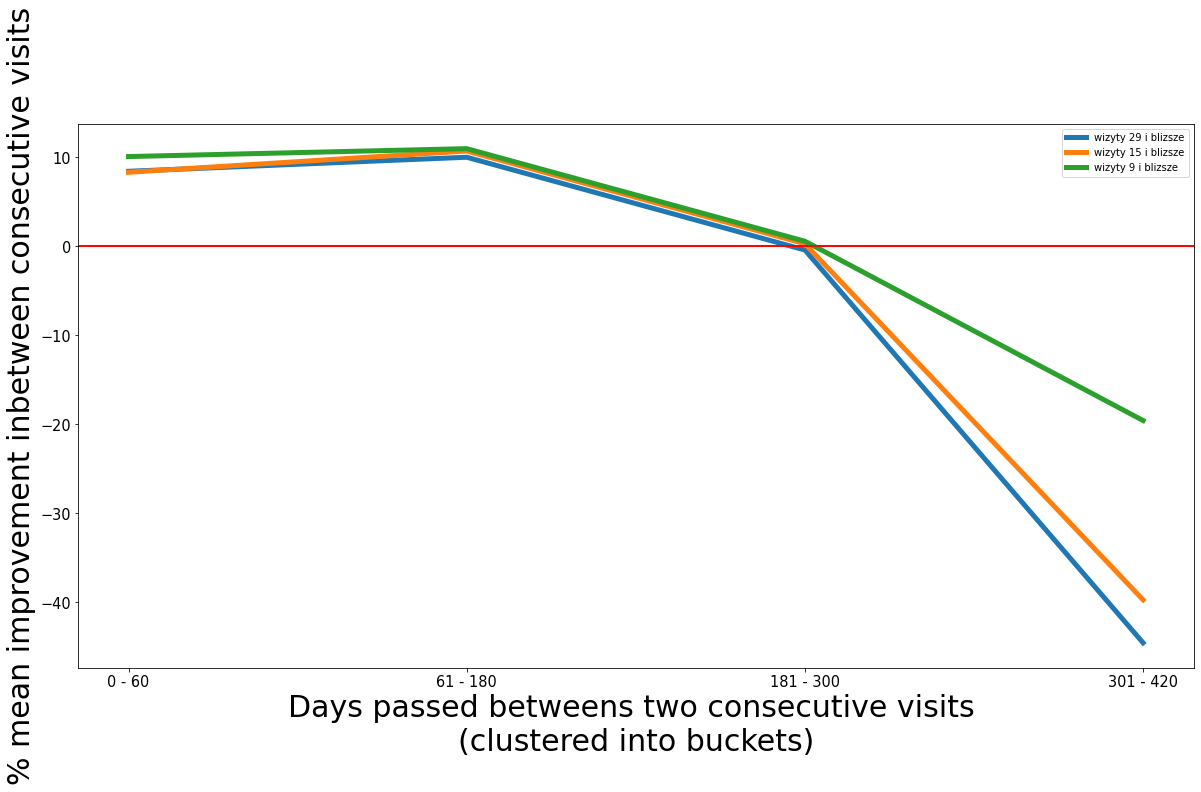

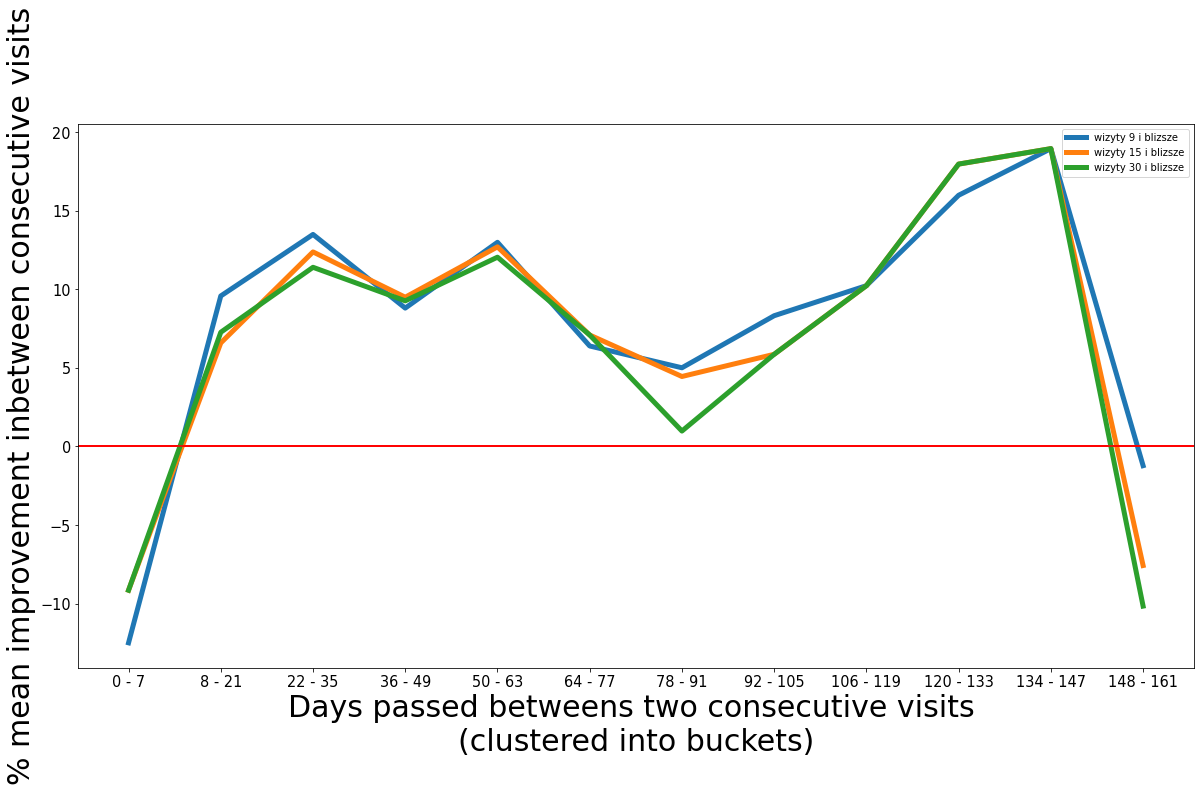

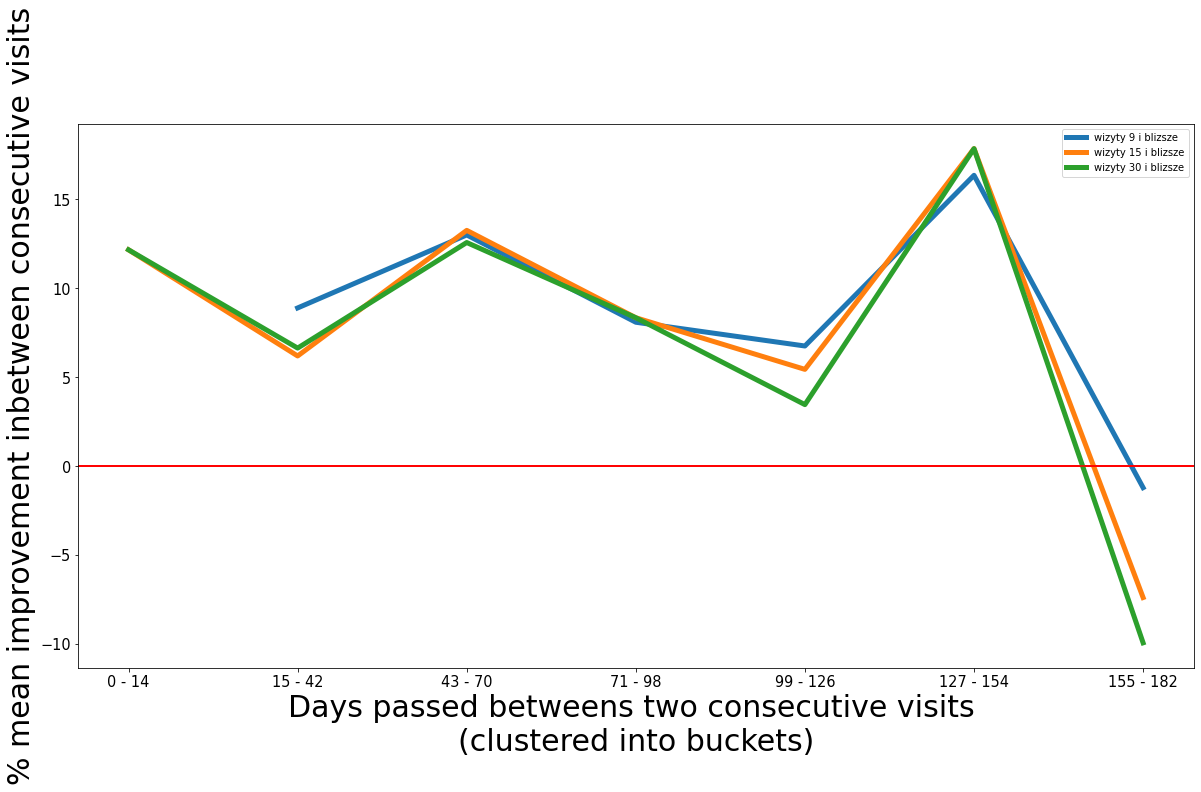

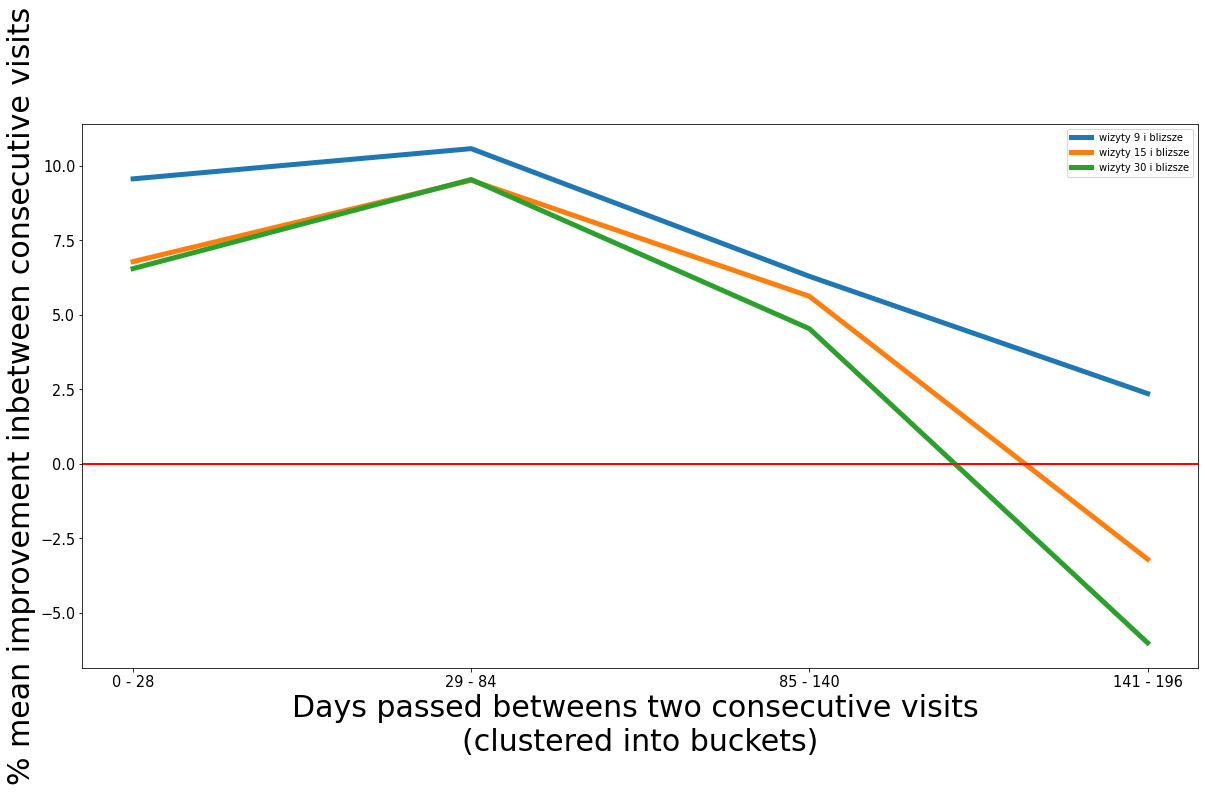

In [ ]:
## Answer to new question asked by Professor:
mam pytanie do Janka, tak jak zobaczyliśmy, że lepiej jest robić wizyty co 90-180 dni czyli co mniej więcej 180 dni, moje pytanie o to czy w fazie do 9 wizyt warto jest robić zabiegi co 4 tygodnie tak jak prosimy czy może jednak co 90 dni. Jest chińska praca na dzieciach, która sugeruje, że co 6 tygodni jest lepiej niż co 2 (ten sam efekt po 3 vs 6 zabiegach) w tym samym czasie. te rozbieżności były zawsze, ale może można spróbować wyszukać optymalnej częstotliwości na podstawie naszych danych?


def answer():
    data = get_data(format_type='all',remove_minus_ones = True )
    # data_up_to_9th = data.loc[data.visit_number <= 9]
    # data_up_to_5th = data.loc[data.visit_number <= 5]
    # data_up_to_15th = data.loc[data.visit_number <= 15]
    a = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    # graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,90,180,270], increment = 90, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    b = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168], increment = 14, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    c = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 28, 56, 84, 112, 140, 168], increment = 28, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    d = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 56, 112, 168], increment = 56, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    return a,b,c,d


a,b,c,d = answer()
display(a)
display(d)
display(c)
display(b)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,time_group,patients_in_bucket visits with nunber 5 and further,patients_in_bucket all visits
0,0,125,216
1,120,55,92
2,240,23,25
3,360,6,12


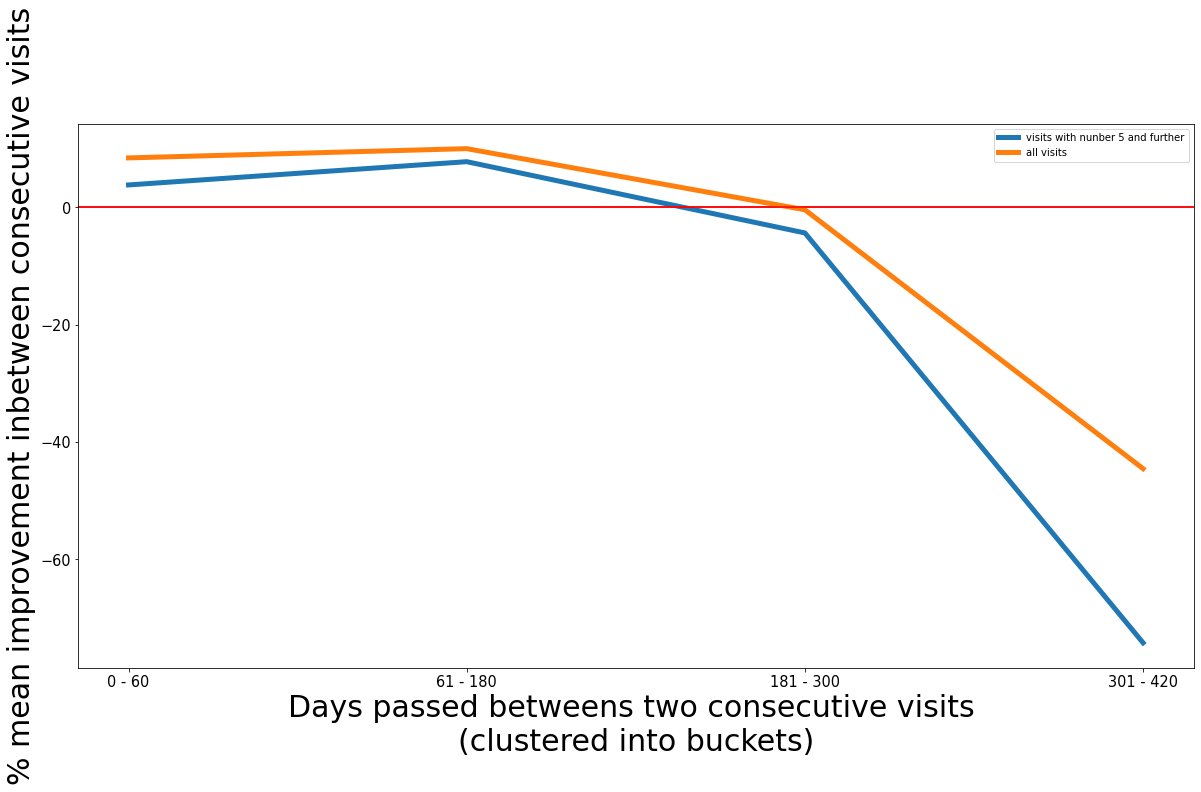

In [ ]:
data = get_data(format_type='all',remove_minus_ones = True )
graph_multiple_time_group_based_avg_graph(data,blizsze = False, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [5,0])

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,time_group,patients_in_bucket all visits
0,0,216
1,120,92
2,240,25
3,360,12


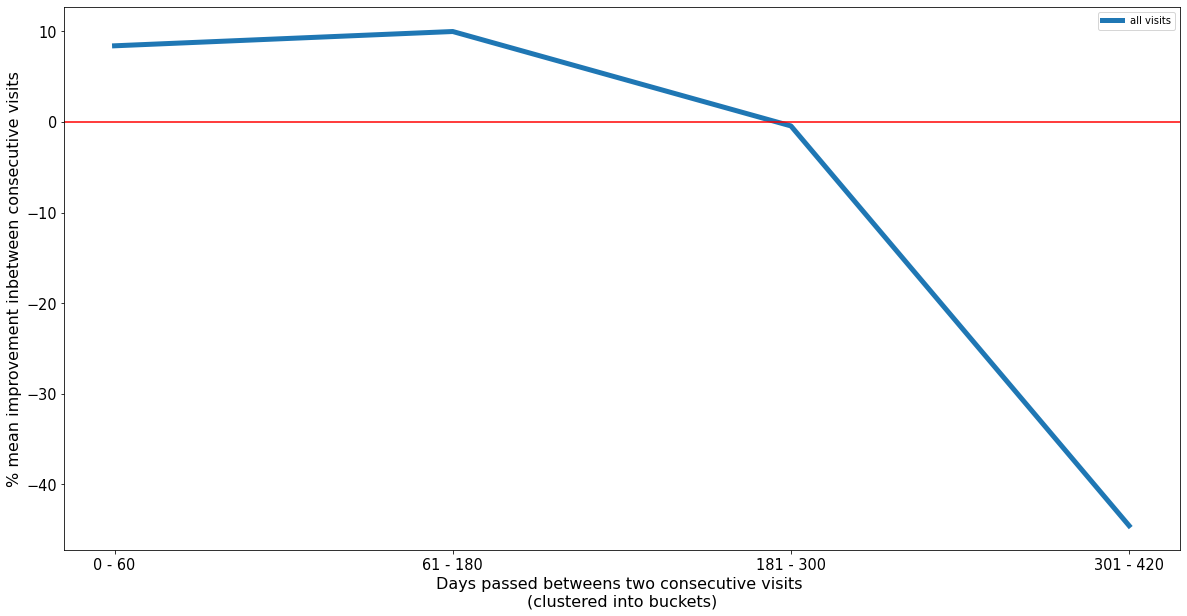

In [ ]:
data = get_data(format_type='all',remove_minus_ones = True )
graph_multiple_time_group_based_avg_graph(data,blizsze = False, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [0])

In [ ]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,90,180,270,360], increment=90)

Pearsons correlation of the linear fit for visits with nunber 10 and further: -0.671 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 5 and further: -0.531 (very bad practice though)
Pearsons correlation of the linear fit for visits with nunber 3 and further: -0.508 (very bad practice though)
Pearsons correlation of the linear fit for all visits: -0.484 (very bad practice though)


,time_group,patients_in_bucket visits with nunber 10 and further,patients_in_bucket visits with nunber 5 and further,patients_in_bucket visits with nunber 3 and further,patients_in_bucket all visits
0,0,1,1,1,1
1,30,51,99,125,160
2,60,17,39,59,82
3,90,5,25,32,38
4,120,1,7,10,13
5,150,1,6,8,10
6,180,5,9,9,10
7,210,4,7,7,8
8,240,1,5,5,6
9,270,1,3,3,3


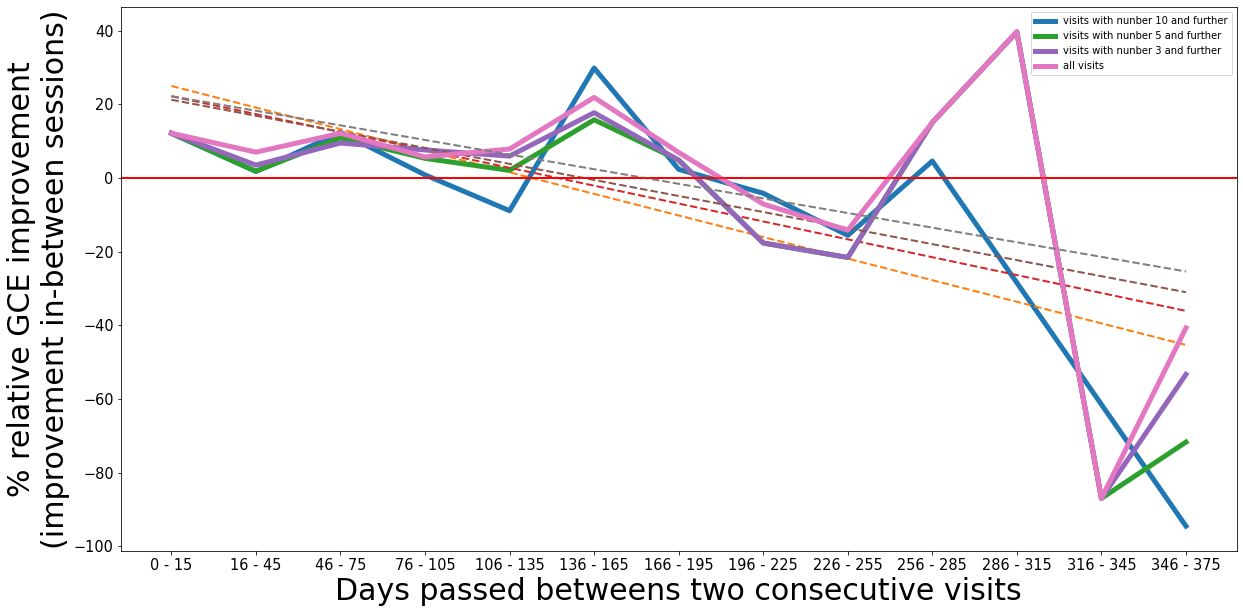

In [ ]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [0,30,60,90,120,150,180,210,240,270,300,330,360], increment=30)

#### Statistical comparison of the means between 2 samples (data divided based on time)

In [ ]:
df = get_data('all', remove_minus_ones = True)
for days_passed_threshold in [60,120,180,240,300,360]:
    print()
    ttest_against_time_threshold(non_moved_df, 
                                 time_threshold = days_passed_threshold, 
                                 related_ttest = False,
                                 clearence_type = "total_clearence_in_between_visits")

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


test for days passsed: 60
left mean: 8.41
right mean: 2.895
p_value: 0.037


test for days passsed: 120
left mean: 8.339
right mean: -3.929
p_value: 0.0012


test for days passsed: 180
left mean: 8.882
right mean: -14.742
p_value: 0.0


test for days passsed: 240
left mean: 8.077
right mean: -23.32
p_value: 0.0


test for days passsed: 300
left mean: 8.182
right mean: -44.552
p_value: 0.0


test for days passsed: 360
left mean: 7.897
right mean: -40.697
p_value: 0.0


In [ ]:
# for visit_nr_threshold in [2,5,6,7,8,9,10,15,20,25]:
#     print(f'TEST FOR FOR NR VISITORS: {visit_nr_threshold}')
#     ttest_against_time_threshold(non_moved_df,
#                                  visit_nr_threshold=visit_nr_threshold, 
#                                  related_ttest = False)
                                 
#     # ttest_against_time_threshold(non_moved_df,
#     #                              visit_nr_threshold=visit_nr_threshold, 
#     #                              related_ttest = True)
#     print('\n\n\n')

# Smaller ad-hocs:

#### Prospetive study of last few patients:
Questions to be answered:
* Did they recover ?
* What was the average worsening like (total_clearence vs clearence_between_visits)
* ...
* ...
* Mention bias

In [1]:
def get_prospective_study_patients_data(format_type, remove_minus_ones):
    from src.load_data import get_data
    df = get_data(format_type=format_type, remove_minus_ones=remove_minus_ones)

    # All data after break
    patient_1_data = df.loc[df['surname'] == '13.Zborowski'].tail(2 + 2)
    patient_2_data = df.loc[df['surname'] == '17. Górszczak'].tail(3 + 1)
    patient_3_data = df.loc[df['surname'] == '35.Twardzik'].tail(3 + 2)
    data = pd.concat([patient_1_data, patient_2_data, patient_3_data])

    # A single visit post-break
    patient_1_data = df.loc[df['surname'] == '13.Zborowski'].iloc[-2:-1, :]
    patient_2_data = df.loc[df['surname'] == '17. Górszczak'].iloc[-3:-2, :]
    patient_3_data = df.loc[df['surname'] == '35.Twardzik'].iloc[-3:-2, :]
    single_visit_data = pd.concat([patient_1_data, patient_2_data, patient_3_data])

    return data, single_visit_data

In [2]:
print(round((76.94844 - 81.18361)))
print(round((70.22114 - 69.87950)))
print(round((84.35648 - 74.00000)))

-4
0
10


In [7]:
data, single_visit_data = get_prospective_study_patients_data(format_type = 'all', remove_minus_ones=True)
from statistics import mean

display(data)

# Manual calculations:
print(f"They all had a break equal to or longer than : {round(1647/365, 2)} years. (but no longer than {round(1867/365, 2)} years)")
print(f"Their PWS has worsen - relatively (129, 214 & 8) percentages. Which averages to {mean([129, 214, 8])} % relative worsening")
print(f"Their PWS has worsen - in respect to beginning -  (2, 39 & 33) percentage points. Which averages to {round(mean([2, 39, 33]),2)} of percentage points worsening per patients")

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,previous treatment
111,13.Zborowski,63,979,1,18,-1.753820,76.98230,,NaN
112,13.Zborowski,42,1021,0,19,-0.147090,76.94844,,NaN
113,13.Zborowski,1867,2888,4,20,-8.369520,75.01914,,NaN
114,13.Zborowski,42,2930,0,21,24.676810,81.18361,,NaN
146,17. Górszczak,216,1210,2,22,-27.367600,70.22114,,NaN
147,17. Górszczak,1647,2857,4,23,-129.042000,31.79399,,NaN
148,17. Górszczak,31,2888,0,24,55.838940,69.87950,,NaN
149,17. Górszczak,37,2925,0,25,-12.503800,66.11329,,NaN
240,35.Twardzik,28,340,0,8,-3.378060,83.59059,,NaN
241,35.Twardzik,28,368,0,9,4.667338,84.35648,,NaN


They all had a break equal to or longer than : 4.51 years. (but no longer than 5.12 years)
Their PWS has worsen - relatively (129, 214 & 8) percentages. Which averages to 117 % relative worsening
Their PWS has worsen - in respect to beginning -  (2, 39 & 33) percentage points. Which averages to 24.67 of percentage points worsening per patients


### Ad-hoc get graph for those points:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[27.04, 77.18, 52.56, 73.41]


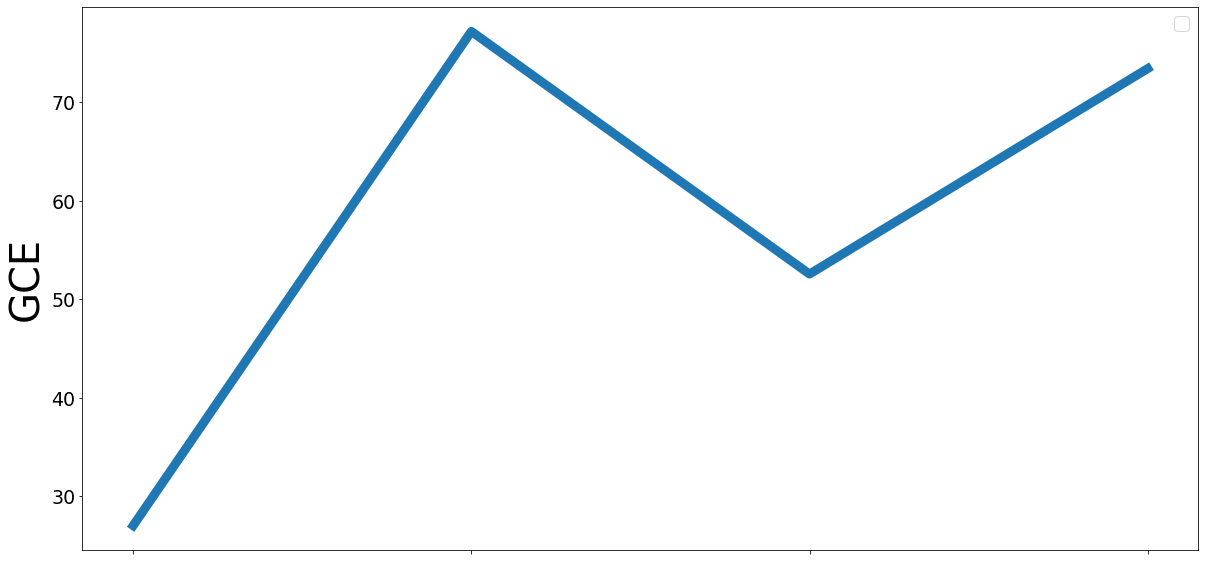

In [8]:
import matplotlib 
patient_1 = [26.54, 70.22, 31.79, 66.11]
patient_2 = [23.21, 76.95, 75.01, 81.18]
patient_3 = [31.37, 84.36, 50.87, 72.93]
matplotlib.rcParams.update({'font.size': 19})

averages = []
for a,b,c in zip(patient_1,patient_2,patient_3):
    averages.append(round((a+b+c)/3,2))
print(averages)


__, ax = plt.subplots(figsize=(20,10))
plt.plot(averages, linewidth=9.0)
plt.ylabel("GCE", size = 40)
# x_ticks_labels = ['pre-treatment','post-treatment',' post break','post returned']
ax.set_xticks([0,1,2,3])
# ax.set_xticklabels(x_ticks_labels, fontsize=25)
ax.set_xticklabels(["", "", "", ""], fontsize=25)

plt.legend()

### Ad-hoc Fill in blank correctely:
##### Lesions not treated for more than **xxx** months worsen **xxx** on average and improved after additional treatment.

In [13]:
# How to approach this one?
def avg_lession_decrease_after_x_months(x, column_name = 'total_clearence_in_between_visits'):
    
    # Load data
    from src.load_data import get_data
    if column_name == 'total_clearence_in_between_visits':
        df = get_data('all', remove_minus_ones=True)
    elif column_name == 'total_clearence_in_respect_to_beginning':
         df = get_data('all', remove_minus_ones=False)
         raise Exception('Hasnt implemented total_clearence_in_respect_to_beginning yet')
    else : 
        raise Exception(f"column name was: {column_name}. But it has to be one of : ['total_clearence_in_between_visits', 'total_clearence_in_respect_to_beginning']")

    
    answer = df.loc[df["time"] >= x * 30].total_clearence_in_between_visits.mean()
    return answer

dict = {}
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    answer = avg_lession_decrease_after_x_months(i)
    # a = pd.DataFrame(columns = [''])
    # a[i] = answer
    dict[i] = round(answer,2)

pd.DataFrame(data = dict.items(), columns = ['month threshold', 'mean GCE inbetween visits'])

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]


Exception: Data reading went wrong! Fix it !

#### Answer to new question asked by Professor:
mam pytanie do Janka, tak jak zobaczyliśmy, że lepiej jest robić wizyty co 90-180 dni czyli co mniej więcej 180 dni, moje pytanie o to czy w fazie do 9 wizyt warto jest robić zabiegi co 4 tygodnie tak jak prosimy czy może jednak co 90 dni. Jest chińska praca na dzieciach, która sugeruje, że co 6 tygodni jest lepiej niż co 2 (ten sam efekt po 3 vs 6 zabiegach) w tym samym czasie. te rozbieżności były zawsze, ale może można spróbować wyszukać optymalnej częstotliwości na podstawie naszych danych?

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,time_group,patients_in_bucket wizyty 29 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 9 i blizsze
0,0,216,199,155
1,120,92,89,76
2,240,25,21,15
3,360,12,10,8


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,49,60,63
1,56,143,185,201
2,112,30,32,33
3,168,32,42,48


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,1,1
1,28,104,138,152
2,56,65,79,84
3,84,34,38,38
4,112,15,17,18
5,140,8,9,9
6,168,28,37,43


,time_group,patients_in_bucket wizyty 9 i blizsze,patients_in_bucket wizyty 15 i blizsze,patients_in_bucket wizyty 30 i blizsze
0,0,0,0,0
1,14,2,5,5
2,28,79,101,111
3,42,41,57,64
4,56,40,48,49
5,70,18,19,20
6,84,19,22,22
7,98,8,9,10
8,112,6,7,7
9,126,6,6,6


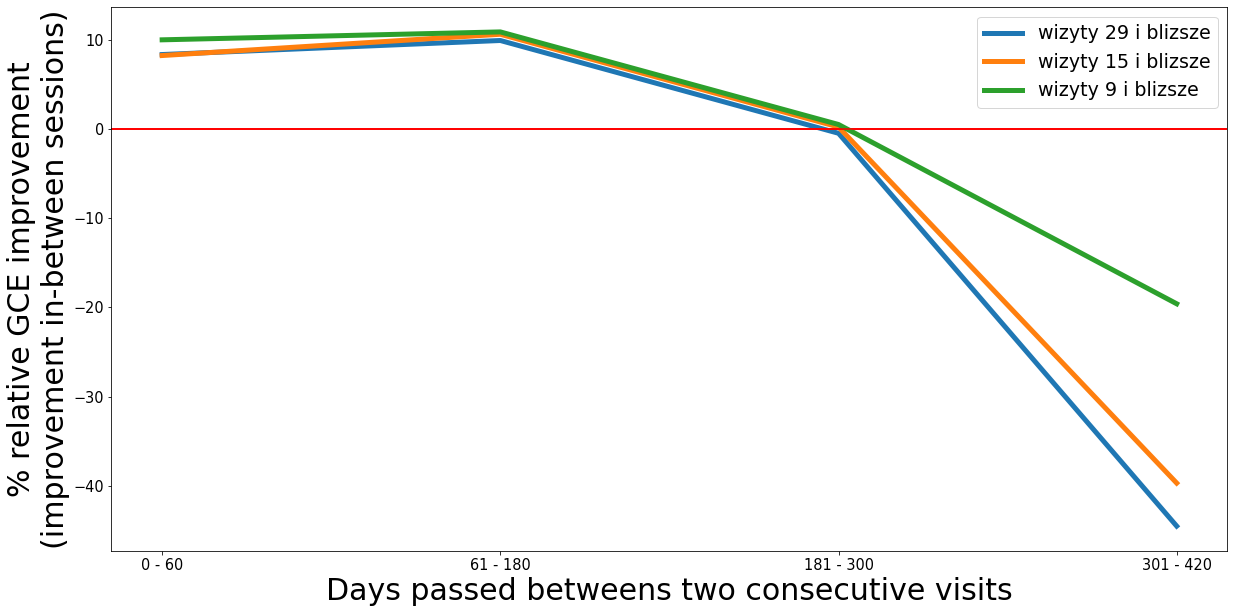

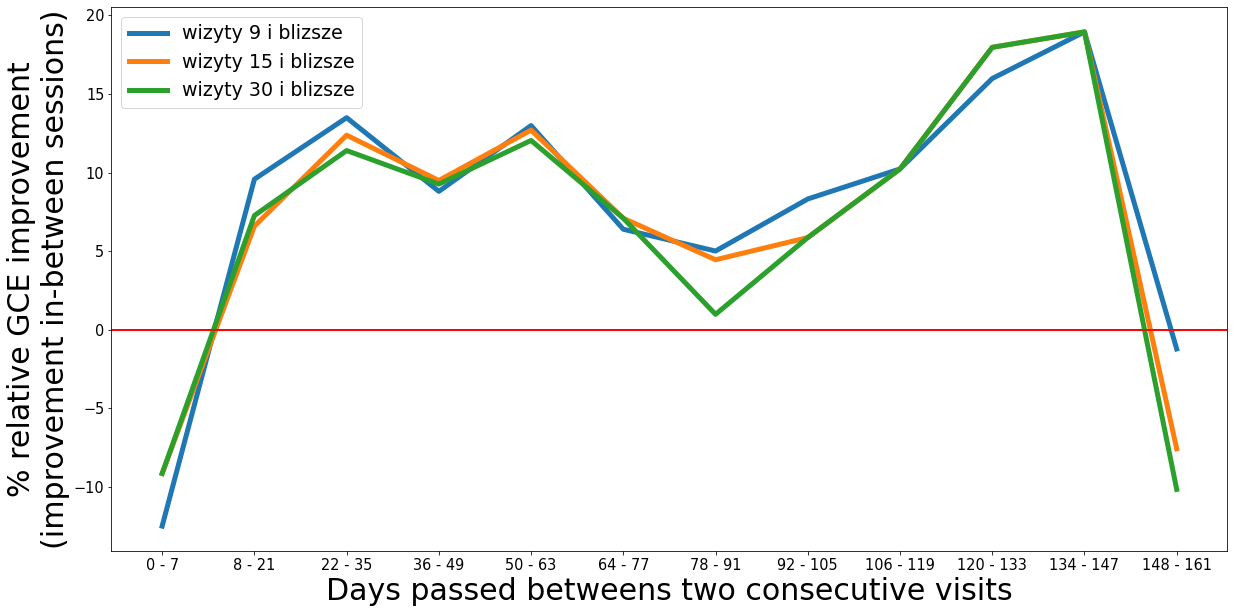

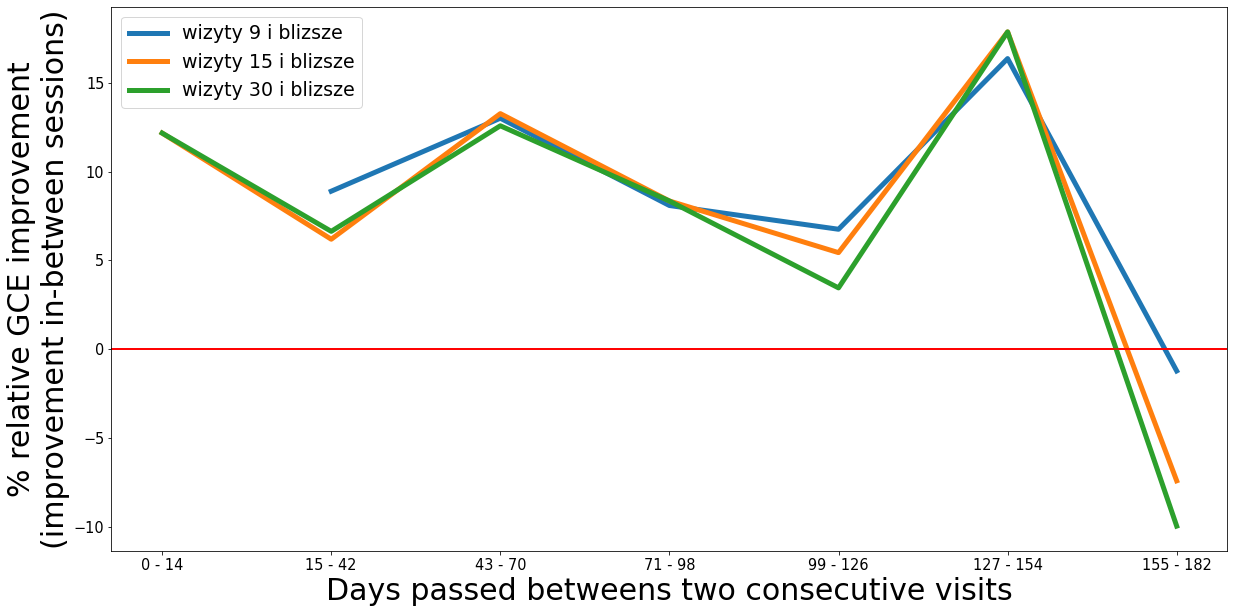

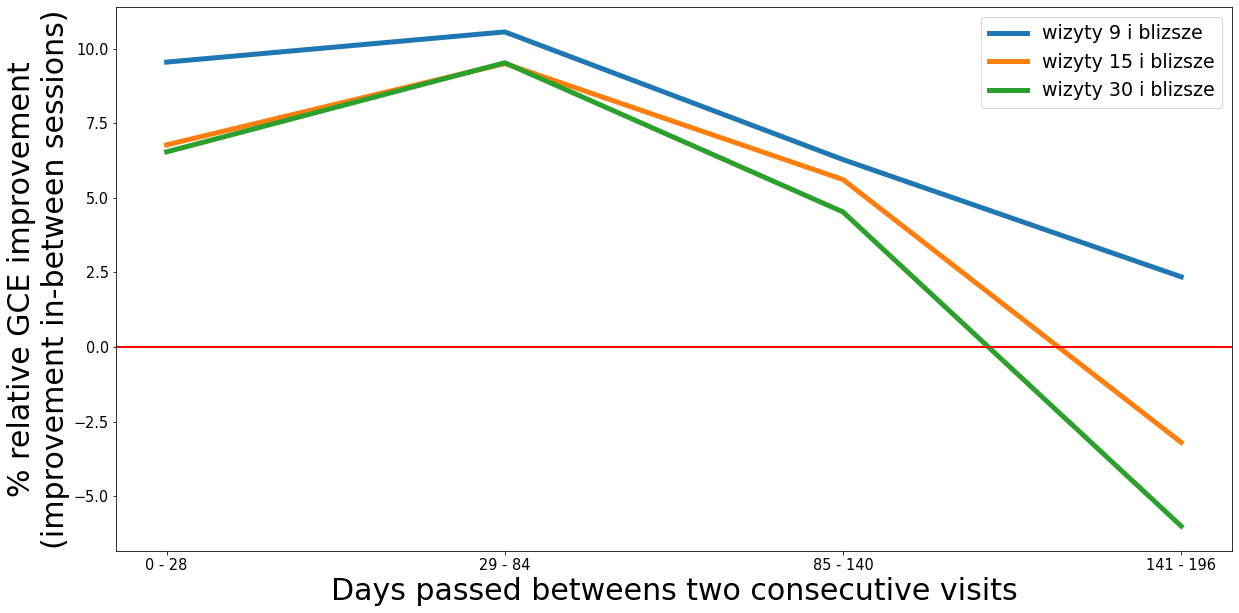

In [ ]:
def answer():
    data = get_data(format_type='all',remove_minus_ones = True )
    # data_up_to_9th = data.loc[data.visit_number <= 9]
    # data_up_to_5th = data.loc[data.visit_number <= 5]
    # data_up_to_15th = data.loc[data.visit_number <= 15]
    a = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,120,240,360], increment = 120, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    # graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0,90,180,270], increment = 90, skip_linear_fit = True, wizyty_iteration = [29,15,9])
    b = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168], increment = 14, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    c = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 28, 56, 84, 112, 140, 168], increment = 28, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    d = graph_multiple_time_group_based_avg_graph(data, blizsze = True, GROUPS = [0, 56, 112, 168], increment = 56, skip_linear_fit = True, wizyty_iteration = [9,15,30])
    return a,b,c,d


a,b,c,d = answer()
display(a)
display(d)
display(c)
display(b)

## Ad-hoc Statistics for PWS worsening over-time:


In [ ]:
def bucketed_time_mean_comparison(
    bucket_column = 'time',
    variable_column = 'total_clearence_in_between_visits',
    # buckets = [1,60,120,180,270,360],
    buckets = [0,90,180,270,10000],
):

    df = get_data(format_type='all', remove_minus_ones = True)
    data_dict = {}
    data_2d_arr = []
    for i in range(len(buckets) - 1):
        bucket_min = buckets[i]
        bucket_max = buckets[i+1]
        bucket_range = f"{bucket_min + 1} - {bucket_max}"


        # Extra special case handle line:
        if bucket_max == 10000:
            bucket_range = f"{bucket_min} +"

        visits_data = list(df.loc[(df[bucket_column] >= bucket_min) & (df[bucket_column] < bucket_max)][variable_column])
        data_dict[bucket_range] = visits_data
        data_2d_arr.append(visits_data)

    # _, p_value = stats.f_oneway(*data_2d_arr)
    # print('\n\n\n')
    # print('anova results:')
    # print(f'buckets: {buckets}')
    # print(f'p_value: {p_value}\n')

    to_be_plot_data = []
    means = []
    p_values = []
    prev_data = ''
    prev_bucket_range = ''
    bucket_ranges = []
    for bucket_range, data in data_dict.items():
        means.append(round(get_mean(data),2))
        bucket_ranges.append(bucket_range)
        if prev_data == '' :
            prev_data = data
            prev_bucket_range = bucket_range
            continue

        left_mean = round(get_mean(prev_data),2)
        right_mean = round(get_mean(data),2)
        _, p_value = ttest_not_related(prev_data, data, alternative= 'greater')
        p_value = round(p_value,5)
        print(f'statistics between {prev_bucket_range} bucket and {bucket_range} bucket')
        print(f'means: {left_mean} vs {right_mean}')
        print(f"p-value: {p_value}\n")
        p_values.append(p_value)
        to_be_plot_data.append([bucket_range, left_mean, right_mean, p_value])

        prev_data = data
        prev_bucket_range = bucket_range



    # Move it to func
    plt.figure(figsize=(20,10))
    index = 1
    x_ticks = []
    buckets = []
    for i, bucket_range in enumerate(bucket_ranges):
        if i == 0 or i == len(bucket_ranges) - 1:
            buckets.append(bucket_range)
        else : 
            buckets.append(bucket_range)
            buckets.append(bucket_range)

    for i, mean in enumerate(means):
        X_AXIS_INCREMENT = 0.5
        BREAK_INCREMENT = 2

        if index == 1:
            X_axis_index = X_AXIS_INCREMENT * index
            data = mean

        elif i == len(means) - 1 :
            X_axis_index = X_AXIS_INCREMENT * index
            data = mean

        else :
            X_axis_index = [index * X_AXIS_INCREMENT, (index + 2) * X_AXIS_INCREMENT ]
            data = [mean, mean]
            index += BREAK_INCREMENT

        plt.bar(X_axis_index, data, 0.4)
        # print(X_axis_index)
        index += 1


        # Get ticks
        if type(X_axis_index) == list:
            for i in X_axis_index:
                x_ticks.append(i)
        else :
            x_ticks.append(X_axis_index)


        
    plt.xticks(x_ticks, buckets)
    plt.xlabel('\nnumber of laser sessions (clustered into buckets based on time inbetween visits)', fontsize=17)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.ylabel('% mean improvement\n(relative clearance in between visits)\n', fontsize=19)
    ax = plt.gca()


    # Handle labels:
    labels_places = []
    for i in range(len(x_ticks) - 1):
        if i%2 == 1:
            continue
        before = x_ticks[i]
        after = x_ticks[i+1]
        label_place = (before+after)/2
        labels_places.append(label_place)

    for label, p_value  in zip(labels_places, p_values):
        height = 9.3
        if p_value == 'n.s.':
            text = 'n.s.'
        else : 
            text = f"p-value: {p_value}"
        ax.text(label, height, text, ha="center", va="bottom", size = 18)
    ax = plt.gca()
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14.5)

    plt.show()

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
statistics between 1 - 90 bucket and 91 - 180 bucket
means: 8.84 vs 9.16
p-value: 0.53386

statistics between 91 - 180 bucket and 181 - 270 bucket
means: 9.16 vs -6.25
p-value: 0.01299

statistics between 181 - 270 bucket and 270 + bucket
means: -6.25 vs -25.89
p-value: 0.12897



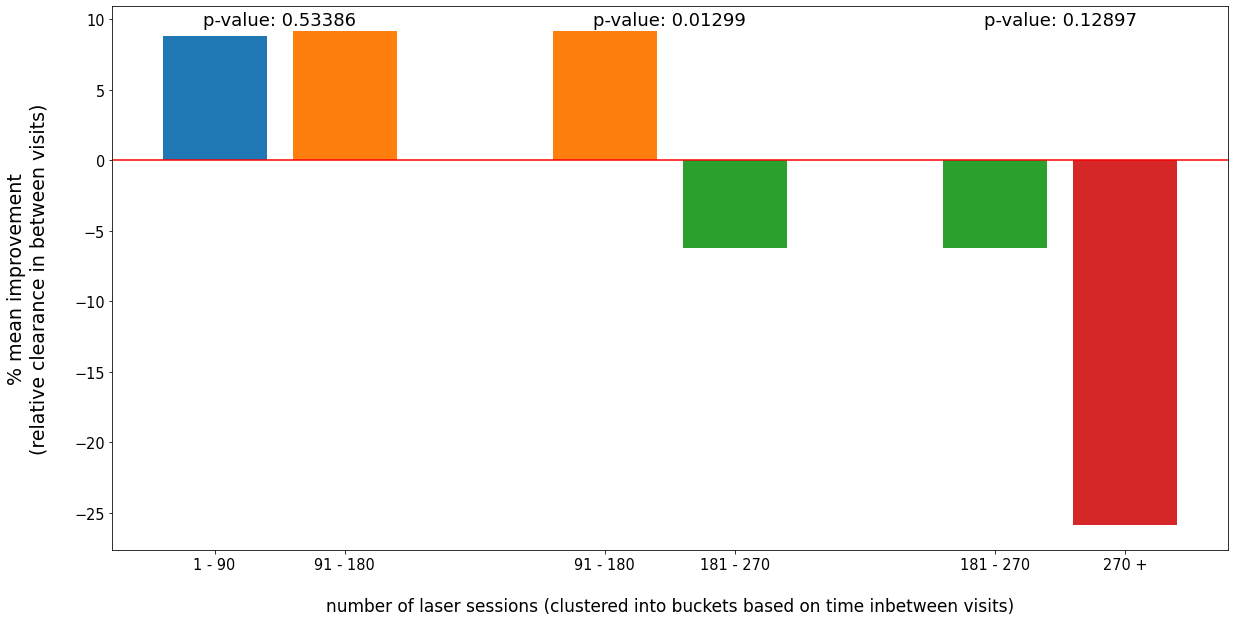

In [ ]:
bucketed_time_mean_comparison()

## Adhoc - fill in the blank 2
was 70.4 in previously untreated and xxx in previously treated PWS.

In [18]:
def fill_in_previous_treatment(df):
    new_pt = []
    current_pt = ''
    for i in df['previous treatment']:
        if type(i) == str:
            current_pt = i
        new_pt.append(current_pt)
    df['previous treatment'] = new_pt
    return df

In [19]:
df = get_data("all", remove_minus_ones=False)
df = fill_in_previous_treatment(df)
df

default time group has GROUPS defined as: [0, 90, 180, 270, 360]


,surname,time,summed_time,time_group,visit_number,total_clearence_in_between_visits,total_clearence_in_respect_to_beginning,------------,previous treatment
0,1.Gasek,57,57,1,1,10.43594,10.435942,,Yes
1,1.Gasek,958,1015,4,2,-1.90988,8.725376,,Yes
2,1.Gasek,70,1085,1,3,-3.15234,5.848092,,Yes
3,1.Gasek,63,1148,1,4,26.20423,30.519873,,Yes
4,1.Gasek,238,1386,3,5,-0.99610,29.827784,,Yes
...,...,...,...,...,...,...,...,...,...
416,70. Wójcicki,98,171,1,5,10.43594,57.625847,,Yes
417,70. Wójcicki,84,255,1,6,-1.90988,75.286637,,Yes
418,70. Wójcicki,84,339,1,7,-3.15234,69.913296,,Yes
419,70. Wójcicki,70,409,1,8,26.20423,83.173308,,Yes


In [35]:
from statistics import mean

def abstract_stats_3(df):
    untreated_max_gce_list = []
    treated_max_gce_list = []
    definitely_no_list = []
    surnames = df.surname.unique()
    for surname in surnames:
        patient = df.loc[df["surname"] == surname]
        max_gce = patient.total_clearence_in_respect_to_beginning.max()
        treated = patient['previous treatment'].iloc[0] == 'Yes'
        definitely_no = patient['previous treatment'].iloc[0] == 'No'
        if definitely_no:
            definitely_no_list.append(max_gce)
        # print(patient['previous treatment'].iloc[0])
        # print(treated)
        if treated : 
            treated_max_gce_list.append(max_gce)
        else :
            untreated_max_gce_list.append(max_gce)
    print("treated list:", treated_max_gce_list)
    print("untreated list:", untreated_max_gce_list)
    print()
    print("treated mean:", mean(treated_max_gce_list))
    print("un-treated mean:", mean(untreated_max_gce_list))
    print("all mean:", mean(untreated_max_gce_list + treated_max_gce_list))
    print("definitely no mean:", mean(definitely_no_list))

abstract_stats_3(df)

treated list: [30.5198727, 93.2427, 82.97724, 71.8354, 52.93478, 60.98415, 81.18361, 78.18319, 29.958, 38.47052, 68.26256, 24.05231, 68.24106, -27.7512, 56.9571, 67.27424, 69.23095, 95.63411, 56.99166, 10.75207, 70.63155, 59.09456, 67.91032, 43.37135, 56.67877, 70.601732, 45.55147, 14.922438, 42.714032, 60.13161, 83.173308]
untreated list: [18.55294, 19.86741, 56.56791, 72.02057, 70.36011, 81.44597, 76.61975, 51.6242, 97.86379, 48.17761, 50.43653, 83.87239, 85.5047, 68.59224, 81.82628, 63.61154, 84.65033, 42.59262, 40.05391, 67.56199, 76.03380621, 56.44457, -14.630416, 77.086358, 65.269524]

treated mean: 55.635982667741935
un-treated mean: 60.8802652884
all mean: 57.97718026625
definitely no mean: 63.907455142857145


In [20]:
[0] + [2]

[0, 2]

In [ ]:
# by hand for treated:
